<a href="https://colab.research.google.com/github/Arvind-tech98/Machine-Learning-algo.-examples/blob/main/Fuzzy_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering

> **Cluster** analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

> 1. Hard clustering:

      -- Hierarchical Clustering 
      -- Hierarchical Clustering

> 2. Soft Clustering:

    -- Fuzzy Clustering

##Fuzzy Clustering

In Fuzzy clustering each element has a set of membership coefficients corresponding to the degree of being in a given cluster. Points close to the center of a cluster, may be in the cluster to a higher degree than points in the edge of a cluster. The degree, to which an element belongs to a given cluster, is a numerical value varying from 0 to 1.

### ********************CODE********************


In [ ]:
# Downloading skfuzzy library
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=9de27a950bb7f0584cb820e7c120b71901c501bd6f74df421e2c4df12a6e5e81
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
#Libraries
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Configure some general styling
sns.set_style("white")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (8,7)

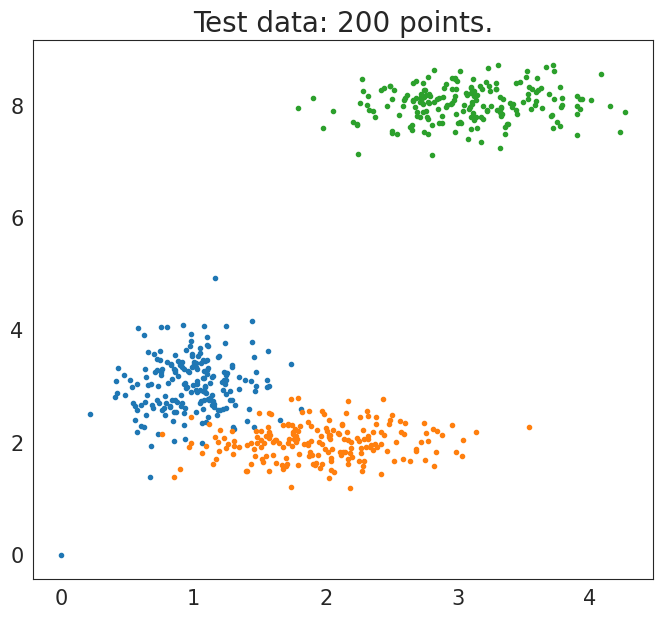

In [ ]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[1, 3],
           [2, 2],
           [3, 8]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.3, 0.5],
          [0.5, 0.3],
          [0.5, 0.3]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.')
ax0.set_title('Test data: 200 points.')
plt.show()

Here is we created our test data and plotted them in the figure. With a human eye I can see there there are 3 distinct clusters however we would like to see which number of clusters best produces the clustering model. To be able to achieve that we will loop from 2 to 10 number of clusters (named centers in this library):

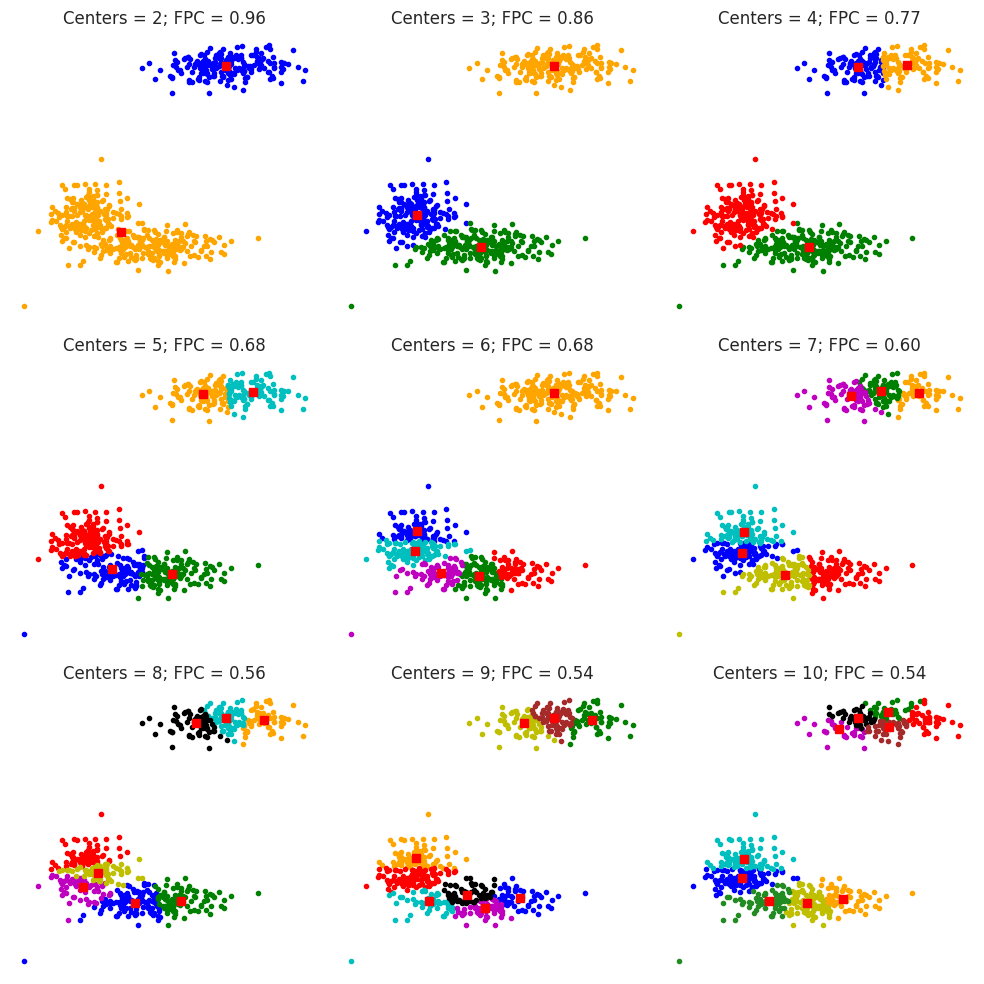

In [ ]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
    ax.axis('off')

fig1.tight_layout()

In the plot we see 2 parameters showed along side with the clusters with different number centers. First parameter is called centers which indicates number of clusters. Second parameter (FPC - Fuzzy Partition Coefficient) is defined to be in 0-1 range, with 1 being the best. It is a metric which tells us how cleanly our data is described by a certain model. Next we will cluster our set of data - which we know has three clusters - several times, with between 2 and 9 clusters. We will then show the results of the clustering, and plot the fuzzy partition coefficient. When the FPC is maximized, our data is described best.

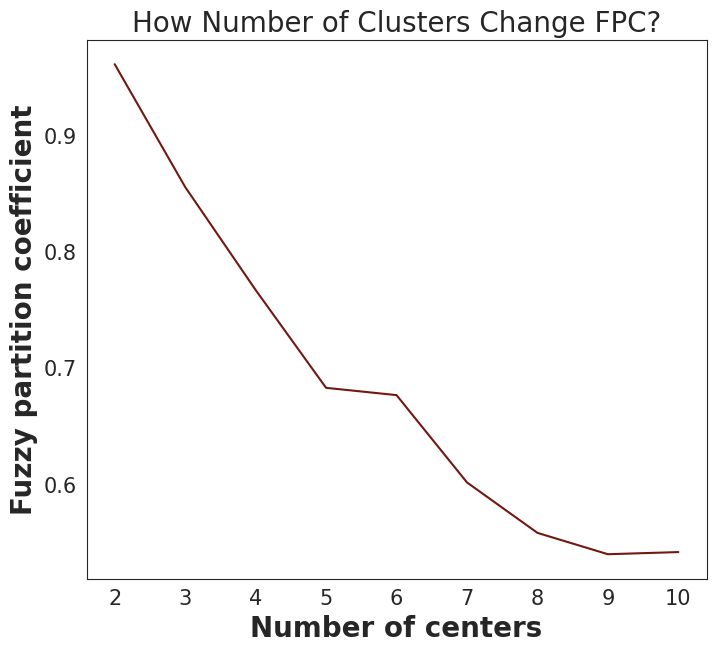

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='#731810')
ax2.set_title("How Number of Clusters Change FPC?")
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()

As we can see, the ideal number of centers is 2. This isn’t news for our contrived example, but having the FPC available can be very useful when the structure of your data is unclear.

Note that we started with two centers, not one; clustering a dataset with only one cluster center is the trivial solution and will by definition return FPC == 1.